In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
DATADIR = "E:\ML\CK+"
LABELS = ["anger", "contempt", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]


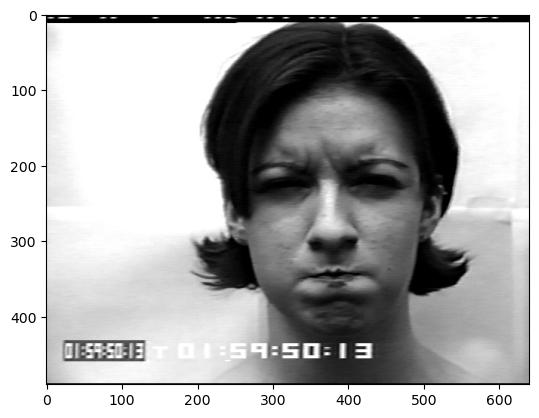

In [4]:
for label in LABELS:
    path = os.path.join(DATADIR, label)
    for img in os.listdir(path):
        img_array =  cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
img_array.shape

(490, 640)

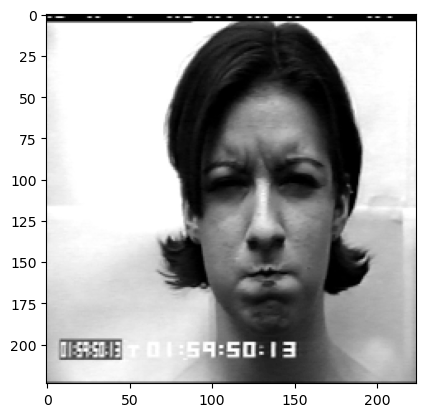

In [6]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')


In [7]:
training_data = []

def create_training_data():
    for label in LABELS:
        path = os.path.join(DATADIR, label)
        class_num = LABELS.index(label)
        for img in os.listdir(path):
            try:
                img_array =  cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()


In [8]:
print(len(training_data))

920


In [9]:
random.shuffle(training_data)


In [10]:
for sample in training_data[:10]:
    print(sample[1])

5
5
5
5
5
7
4
5
5
3


In [11]:
X = []
y = []


In [12]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = torch.tensor(X)
y = torch.tensor(y)

#X = torch.Tensor([i[0] for i in training_data]).view(-1,224,224)
X = X/256
#y = torch.Tensor([i[1] for i in training_data])

C:\Users\Shlesh Gholap\AppData\Local\Temp\ipykernel_46980\959765186.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  X = torch.tensor(X)


In [13]:
print(X.shape)
X = X.view([920, -1, 224, 224])
print(X.shape)


torch.Size([920, 224, 224])
torch.Size([920, 1, 224, 224])


In [14]:
input_size = 224*224
num_classes = 8
learning_rate = 0.0001

b = 20

class DeXNN(nn.Module):
    def __init__(self):
        super(DeXNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 8, stride = 2, padding = 3)
        self.pool1 = nn.MaxPool2d(3, 2)
        self.lrn1 = nn.LocalResponseNorm(64)

        self.conv2a = nn.Conv2d(64, 96, 1, stride = 1, padding = 0)
        self.conv2b = nn.Conv2d(96, 208, 3, padding=1)
        self.pool2a = nn.MaxPool2d(3, 1, padding = 1)
        self.conv2c = nn.Conv2d(64, 64, 1, stride = 1, padding = 0)
        #self.cat2 = torch.cat()
        self.pool2b = nn.MaxPool2d(3, 2)

        self.conv3a = nn.Conv2d(272, 96, 1)
        self.conv3c = nn.Conv2d(272, 64, 1)

        self.fc1 = nn.Linear(919360//b, 90)
        self.fc3 = nn.Linear(90, 8)

    def forward(self, x):
        x = self.lrn1(self.pool1(F.relu(self.conv1(x))))

        y = F.relu(self.conv2c(self.pool2a(x)))
        z = F.relu(self.conv2b(F.relu(self.conv2a(x))))
        x = self.pool2b(torch.cat((y,z),1))

        y = F.relu(self.conv3c(self.pool2a(x)))
        z = F.relu(self.conv2b(F.relu(self.conv3a(x))))
        x = self.pool2b(torch.cat((y,z),1))

        x = x.view(-1, 919360//b)
        x = F.relu(self.fc3(F.relu(self.fc1(x))))
        return x
    #18387200
    
    
model = DeXNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
X = X.float()
X

tensor([[[[0.3555, 0.7969, 0.5117,  ..., 0.7930, 0.3242, 0.0039],
          [0.0117, 0.0117, 0.0039,  ..., 0.0078, 0.0000, 0.0000],
          [0.3633, 0.7695, 0.5078,  ..., 0.7891, 0.3398, 0.0039],
          ...,
          [0.2031, 0.2383, 0.2617,  ..., 0.3203, 0.2461, 0.0156],
          [0.2109, 0.2461, 0.2695,  ..., 0.3320, 0.3008, 0.0625],
          [0.2305, 0.2539, 0.2695,  ..., 0.3203, 0.3359, 0.1289]]],


        [[[0.9805, 0.8594, 0.8594,  ..., 0.8164, 0.8086, 0.0000],
          [0.9805, 0.8477, 0.8555,  ..., 0.8242, 0.8086, 0.0000],
          [0.9766, 0.8516, 0.8516,  ..., 0.8086, 0.8086, 0.0000],
          ...,
          [0.9805, 0.8516, 0.8477,  ..., 0.7188, 0.7188, 0.0000],
          [0.9766, 0.8477, 0.8555,  ..., 0.7188, 0.7188, 0.0000],
          [0.9766, 0.8516, 0.8516,  ..., 0.7188, 0.7188, 0.0000]]],


        [[[0.4336, 0.8047, 0.4805,  ..., 0.9297, 0.5781, 0.1055],
          [0.0156, 0.0039, 0.0078,  ..., 0.0078, 0.0039, 0.0000],
          [0.4648, 0.8008, 0.4609,  ..

In [16]:
batch_size = b
num_epochs = 4

for epoch in range(num_epochs):
    for i in range(0,1000,batch_size):
        images = X[i:i + batch_size] 
        labels = y[i:i + batch_size] 
        #print(images.size(0))
        
        # Forward pass
        outputs = model(images)
        #print(outputs.size(0))
        #print(outputs.size(1))
        #print(labels.size(0))

        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print (f'Epoch [{epoch+1}/{num_epochs}], Step [{int(i/batch_size + 1)}], Loss: {loss.item():.4f}')
     

Epoch [1/4], Step [1], Loss: 2.0770
Epoch [1/4], Step [2], Loss: 2.0354
Epoch [1/4], Step [3], Loss: 1.9433
Epoch [1/4], Step [4], Loss: 1.8858
Epoch [1/4], Step [5], Loss: 1.8974
Epoch [1/4], Step [6], Loss: 1.7313
Epoch [1/4], Step [7], Loss: 1.7993
Epoch [1/4], Step [8], Loss: 1.4607
Epoch [1/4], Step [9], Loss: 1.7382
Epoch [1/4], Step [10], Loss: 1.3308
Epoch [1/4], Step [11], Loss: 1.4140
Epoch [1/4], Step [12], Loss: 1.6490
Epoch [1/4], Step [13], Loss: 1.1870
Epoch [1/4], Step [14], Loss: 1.3677
Epoch [1/4], Step [15], Loss: 1.5481
Epoch [1/4], Step [16], Loss: 1.0210
Epoch [1/4], Step [17], Loss: 1.8625
Epoch [1/4], Step [18], Loss: 0.8572
Epoch [1/4], Step [19], Loss: 1.0680
Epoch [1/4], Step [20], Loss: 0.8745
Epoch [1/4], Step [21], Loss: 1.0231
Epoch [1/4], Step [22], Loss: 1.3279
Epoch [1/4], Step [23], Loss: 0.8893
Epoch [1/4], Step [24], Loss: 1.1291
Epoch [1/4], Step [25], Loss: 1.0619
Epoch [1/4], Step [26], Loss: 1.1969
Epoch [1/4], Step [27], Loss: 1.5581
Epoch [1/4

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i in range(0,1000, batch_size):
        
        images = X[i:i + batch_size] 
        labels = y[i:i + batch_size] 
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1) # max returns (value ,index)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {acc} %')